In [1]:
from app import create_app, db
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    instruments = {b.symbol: b for b in Instrument.find_etfs(100)}
    quote = Quote([*instruments.keys()], 120)
    quote.update_boosts(21, instruments)
    db.session.commit()
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-21 - 100'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
XLP,62,2.271503,1.545243,1.362139,4.021399
SPLV,62,2.006881,1.369318,1.343892,1.971361
IPAY,62,3.000988,2.515622,1.126688,5.347951
USMV,62,2.005298,1.652544,1.112606,2.180427
MTUM,62,1.855401,1.922174,0.878555,2.859384
PPA,62,2.635153,2.833582,0.871154,4.581305
FINX,62,2.200034,2.380889,0.854037,5.312173
XAR,62,2.549642,3.037169,0.784604,6.769803
VPU,62,1.417281,1.820403,0.686998,3.258989


In [8]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, sr=2)

['XLP'] -0.9199988735421805 1 0.8042797087596598 1.36213929115092
['XLP', 'SPLV'] -1.6173547495202074 0.48940037970150096 0.5992759100722795 1.353015519646994


['XLP', 'SPLV']

In [9]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['XLP', 'SPLV'], sr=0)

['XLP', 'SPLV'] 1.0886762897737805 0.48940037970150096 0.5992759100722795 1.353015519646994
['XLP', 'SPLV', 'IPAY'] 0.9866392733403107 0.6305919092462718 0.7560473640940389 1.2775730128264142
['XLP', 'SPLV', 'IPAY', 'USMV'] 0.6033673787034911 0.7273105175063485 0.6760568611971427 1.2363312807488303
['XLP', 'SPLV', 'IPAY', 'PPA'] 0.3980868916806413 0.4019861281968036 0.7961007634838377 1.1759682540888543
['XLP', 'SPLV', 'USMV', 'PPA'] 0.2729190449674856 0.4351945113914237 0.637724533576062 1.1724477754215603
['XLP', 'SPLV', 'PPA', 'VPU'] 0.1360437532035592 0.244391122012488 0.6916526311910712 1.0660458538288422


['XLP', 'SPLV', 'PPA', 'VPU']

In [11]:
quote.setup_mask(['SPLV', 'XLP'])
quote.find_optimal_ratio(21, 2)

     fun: 1.5534829848859117
     jac: array([3.10538721, 3.10949907])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.61603439, 0.38396561])


({'SPLV': 0.6160343943186752, 'XLP': 0.38396560568132476}, 2.1085, 1.2464)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,62.0,2.105104,1.245923,-1.451733,1.723659,2.257250,2.694654,4.335144,1.555824,2.325203
XLP,62.0,2.271503,1.545243,-2.438597,1.639601,2.695942,3.313481,4.497904,1.362139,4.021399
SPLV,62.0,2.006881,1.369318,-0.950248,1.177570,1.909380,2.779976,4.955301,1.343892,1.971361


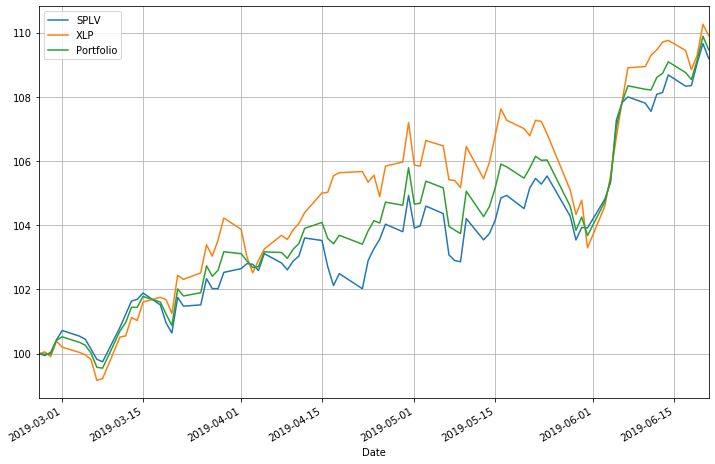

In [12]:
%pylab inline
quote.graph(21, {'SPLV': 0.62, 'XLP': 0.38})